In [ ]:
#!pip install yfinance

[*********************100%***********************]  8 of 8 completed


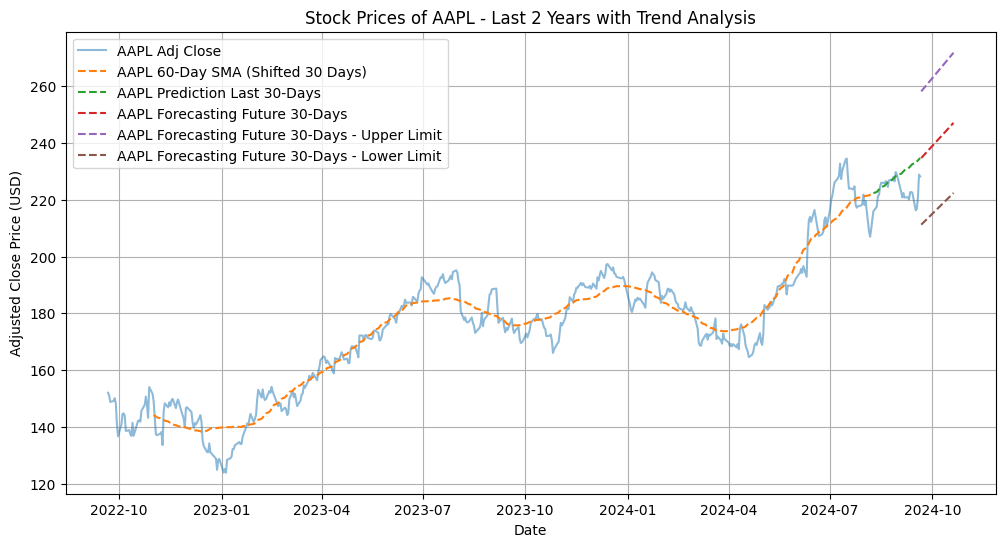

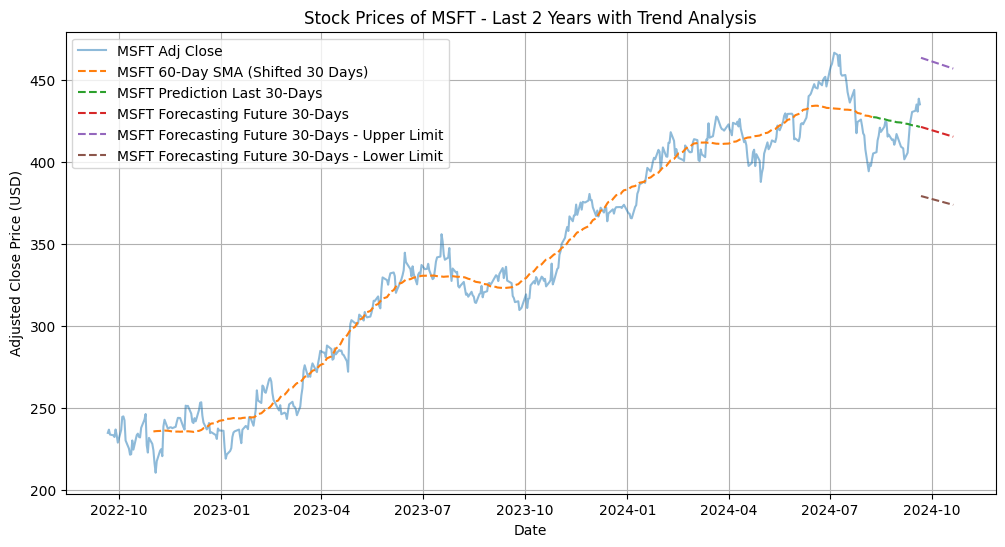

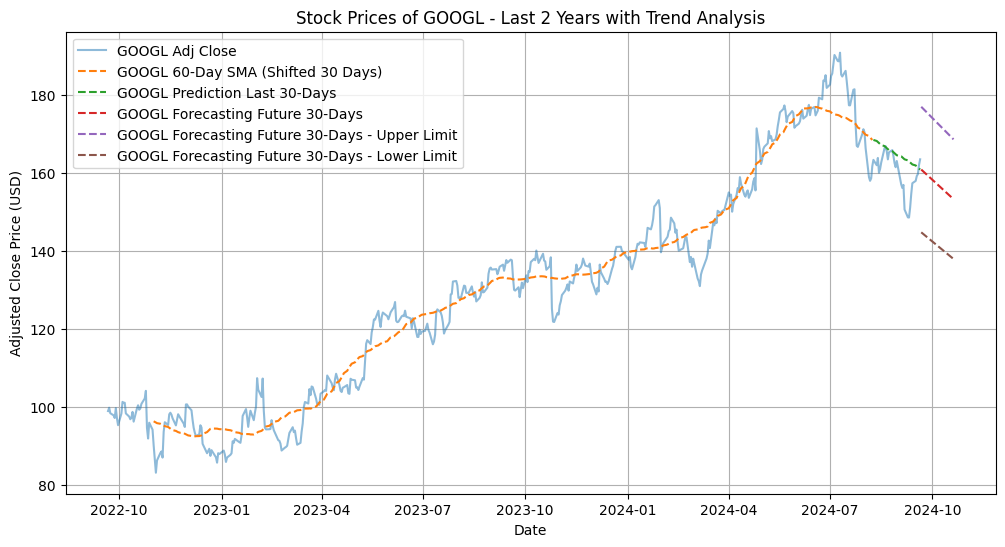

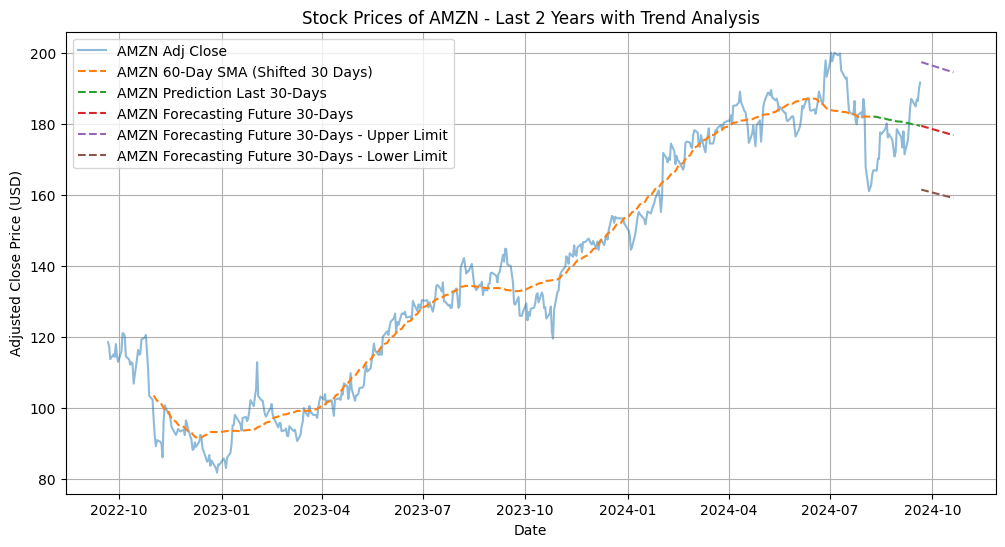

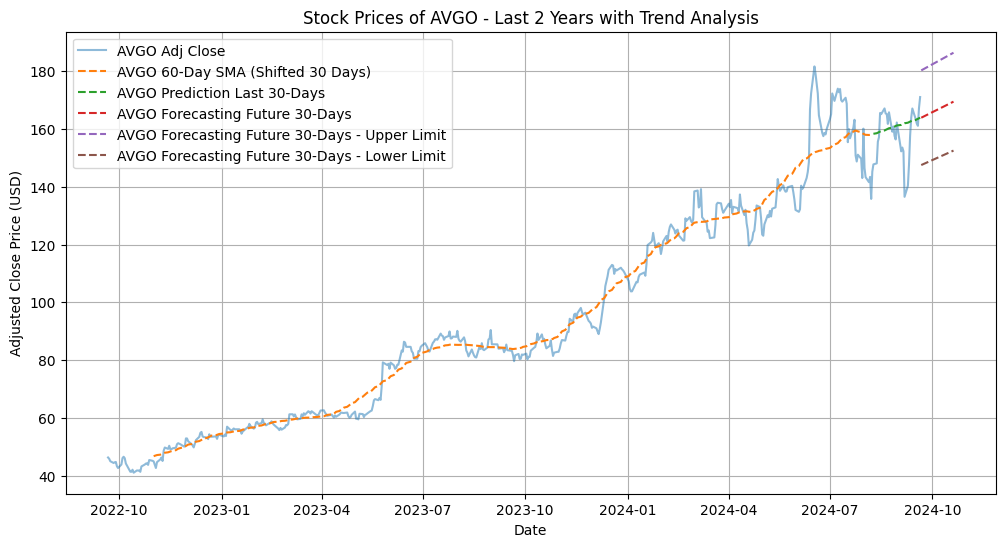

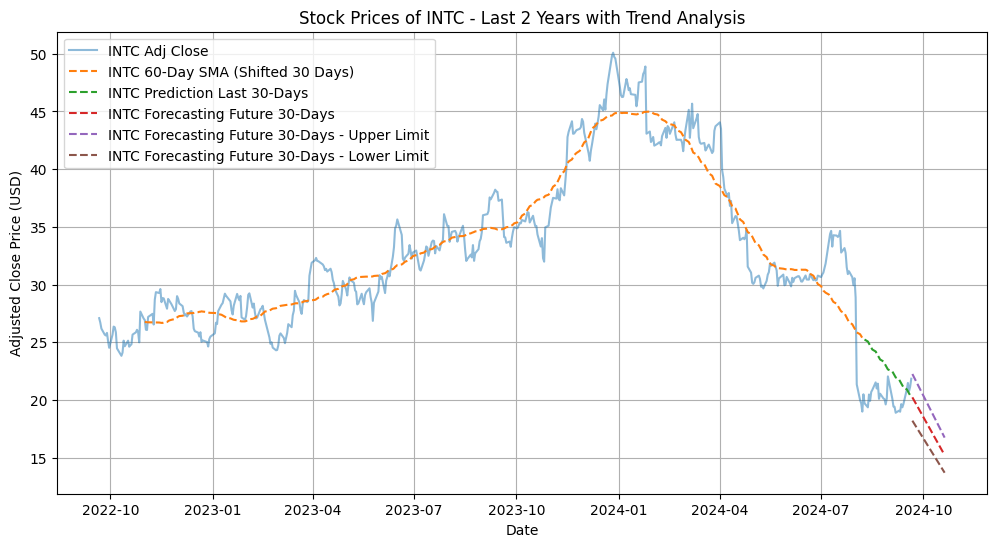

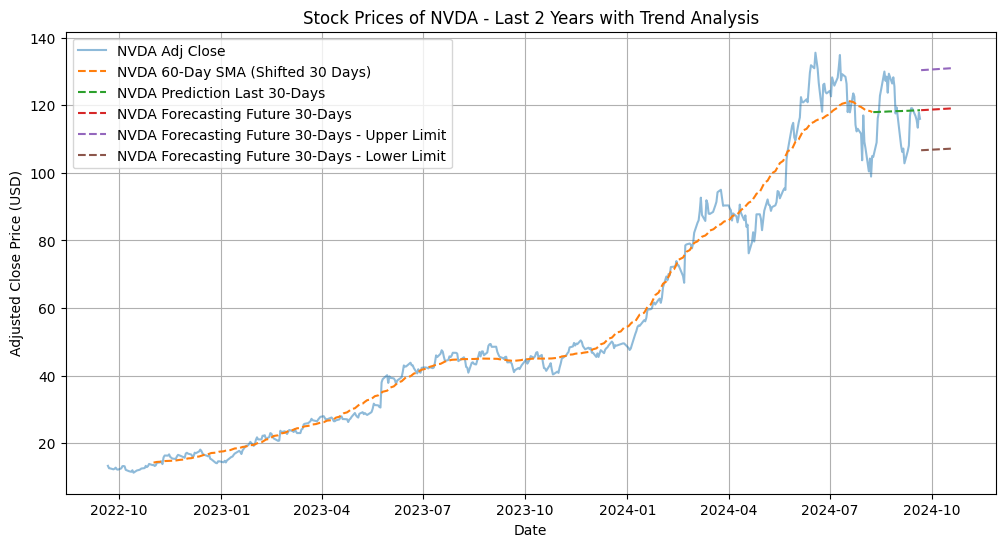

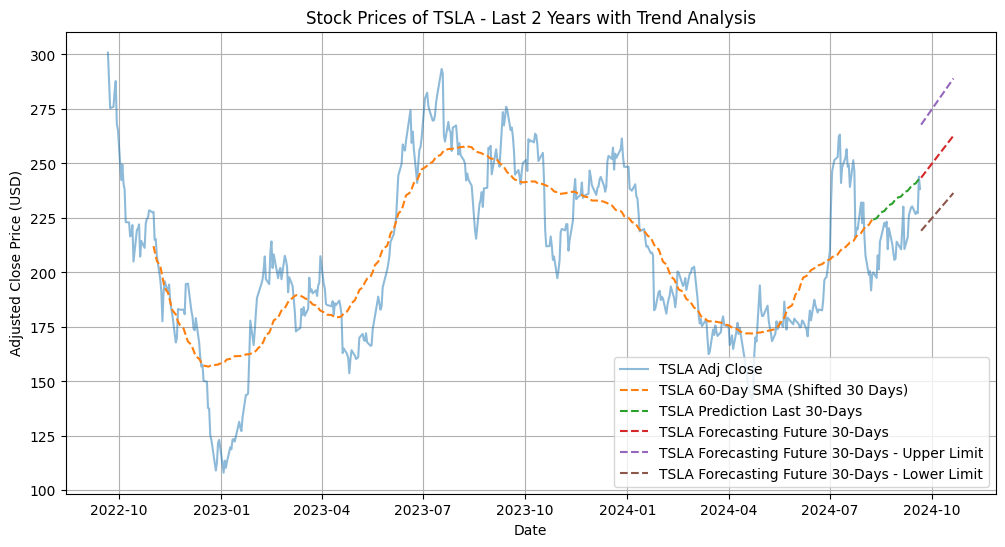

In [68]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np

# Define the exponential function: y = a + exp(b * x)
def line(x, a, b):
    return a + b * x

# Define the stock symbols
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'AVGO', 'INTC', 'NVDA', 'TSLA']
sma_window = 60  # Define the window size for the moving average

# Fetch the stock data for the last 2 years
data = yf.download(stocks, period='2y')


FORECAST=1
bound=0.1
# Create separate plots for each stock
for stock in stocks:
    plt.figure(figsize=(12, 6))

    # Plot the adjusted close price
    plt.plot(data['Adj Close'][stock], label=f'{stock} Adj Close', alpha=0.5)

    # Calculate the moving average and shift it by 50 days
    sma = data['Adj Close'][stock].rolling(window=sma_window).mean().shift(-int(sma_window/2))
    plt.plot(sma, label=f'{stock} {sma_window}-Day SMA (Shifted {int(sma_window/2)} Days)', linestyle='--')


    if FORECAST:
      # Calculate the moving average and shift it by 50 days
      values = sma.values[-int(sma_window):-int(sma_window/2)]
      index = sma.index[-int(sma_window/2):]

      # Fit the exponential function to the data
      params, covariance = curve_fit(line, np.arange(int(sma_window/2)), values)

      # Extract the fitted parameters a and b
      a, b = params

      # Generate fitted y-values using linear regression
      y_fitted = line(np.arange(int(sma_window/2)), values[-1], b)
      prediction = pd.Series(data=y_fitted, index=index)
      plt.plot(prediction, label=f'{stock} Prediction Last {int(sma_window/2)}-Days', linestyle='--')

      # future prediction
      future_dates = pd.date_range(start=index[-1], periods=int(sma_window/2)+1, freq='D')[1:int(sma_window/2)+1]
      y_future = line(np.arange(int(sma_window/2)), y_fitted[-1], b)
      upper_bound = y_future * (1.0+bound)
      lower_bound = y_future * (1.0-bound)
      forecasting = pd.Series(data=y_future, index=future_dates)
      plt.plot(forecasting, label=f'{stock} Forecasting Future {int(sma_window/2)}-Days', linestyle='--')
      upper = pd.Series(data=upper_bound, index=future_dates)
      plt.plot(upper, label=f'{stock} Forecasting Future {int(sma_window/2)}-Days - Upper Limit', linestyle='--')
      lower = pd.Series(data=lower_bound, index=future_dates)
      plt.plot(lower, label=f'{stock} Forecasting Future {int(sma_window/2)}-Days - Lower Limit', linestyle='--')


    # Adding title and labels
    plt.title(f'Stock Prices of {stock} - Last 2 Years with Trend Analysis')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price (USD)')
    plt.legend()

    # Display the plot
    plt.grid(True)
    plt.show()

In [ ]:

future_dates = pd.date_range(start=index[-1], periods=51, freq='D')[1:51]
print(future_dates)

DatetimeIndex(['2024-09-21 00:00:00+00:00', '2024-09-22 00:00:00+00:00',
               '2024-09-23 00:00:00+00:00', '2024-09-24 00:00:00+00:00',
               '2024-09-25 00:00:00+00:00', '2024-09-26 00:00:00+00:00',
               '2024-09-27 00:00:00+00:00', '2024-09-28 00:00:00+00:00',
               '2024-09-29 00:00:00+00:00', '2024-09-30 00:00:00+00:00',
               '2024-10-01 00:00:00+00:00', '2024-10-02 00:00:00+00:00',
               '2024-10-03 00:00:00+00:00', '2024-10-04 00:00:00+00:00',
               '2024-10-05 00:00:00+00:00', '2024-10-06 00:00:00+00:00',
               '2024-10-07 00:00:00+00:00', '2024-10-08 00:00:00+00:00',
               '2024-10-09 00:00:00+00:00', '2024-10-10 00:00:00+00:00',
               '2024-10-11 00:00:00+00:00', '2024-10-12 00:00:00+00:00',
               '2024-10-13 00:00:00+00:00', '2024-10-14 00:00:00+00:00',
               '2024-10-15 00:00:00+00:00', '2024-10-16 00:00:00+00:00',
               '2024-10-17 00:00:00+00:00', '2024-1